In [1]:
#preparing data and importing necessary modules
import tensorflow.keras as keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv2D,
    MaxPool2D,
    Flatten,
    Dropout,
    BatchNormalization,
)
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Load in our data from CSV files
train_df = pd.read_csv("data/asl_data/sign_mnist_train.csv")
valid_df = pd.read_csv("data/asl_data/sign_mnist_valid.csv")

# Separate out our target values
y_train = train_df['label']
y_valid = valid_df['label']
del train_df['label']
del valid_df['label']

# Separate our our image vectors
x_train = train_df.values
x_valid = valid_df.values

# Turn our scalar targets into binary categories
num_classes = 24
y_train = keras.utils.to_categorical(y_train, num_classes)
y_valid = keras.utils.to_categorical(y_valid, num_classes)

# Normalize our image data
x_train = x_train / 255
x_valid = x_valid / 255

# Reshape the image data for the convolutional network
x_train = x_train.reshape(-1,28,28,1)
x_valid = x_valid.reshape(-1,28,28,1)

In [2]:
#creating model

model = Sequential()
model.add(Conv2D(75, (3, 3), strides=1, padding="same", activation="relu", 
                 input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(50, (3, 3), strides=1, padding="same", activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(25, (3, 3), strides=1, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Flatten())
model.add(Dense(units=512, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(units=num_classes, activation="softmax"))

In [3]:
# in this cell we apply the parameters for our data augmentation like rotation, zoom. horizontal, and vertical
# shift, and horizontal and vertical flip
#in this case we don't want to vertically flip the images because the model would have a difficult time indentifying
#asl letters if given upside down images in the validation set

datagen = ImageDataGenerator(
    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range=0.1,  # Randomly zoom image
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images horizontally
    vertical_flip=False, # Don't randomly flip images vertically
)  

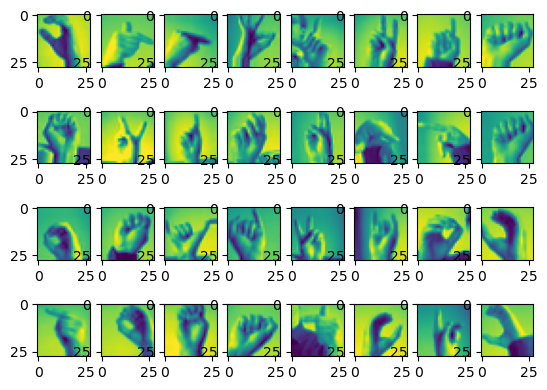

In [4]:
#displaying our data randomly so the model can train on a random sample
batch_size = 32
img_iter = datagen.flow(x_train, y_train, batch_size=batch_size)

x, y = img_iter.next()
fig, ax = plt.subplots(nrows=4, ncols=8)
for i in range(batch_size):
    image = x[i]
    ax.flatten()[i].imshow(np.squeeze(image))
plt.show()

In [5]:
#fitting data to generator

datagen.fit(x_train)

In [6]:
#compiling model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
#Training the model with augmented images using keras to explicitly set how
#long each epoch runs 
model.fit(img_iter,
          epochs=10,
          steps_per_epoch=len(x_train)/batch_size, 
          validation_data=(x_valid, y_valid))

Epoch 1/10
857/857 [==============================] - 20s 23ms/step - loss: 0.0718 - accuracy: 0.9782 - val_loss: 0.0138 - val_accuracy: 0.9951
Epoch 2/10
857/857 [==============================] - 21s 24ms/step - loss: 0.0681 - accuracy: 0.9803 - val_loss: 0.4067 - val_accuracy: 0.9124
Epoch 3/10
857/857 [==============================] - 21s 24ms/step - loss: 0.0649 - accuracy: 0.9805 - val_loss: 0.0423 - val_accuracy: 0.9833
Epoch 4/10
857/857 [==============================] - 20s 24ms/step - loss: 0.0652 - accuracy: 0.9816 - val_loss: 0.0135 - val_accuracy: 0.9932
Epoch 5/10
857/857 [==============================] - 19s 22ms/step - loss: 0.0624 - accuracy: 0.9826 - val_loss: 0.0323 - val_accuracy: 0.9863
Epoch 6/10
857/857 [==============================] - 19s 22ms/step - loss: 0.0594 - accuracy: 0.9838 - val_loss: 0.0374 - val_accuracy: 0.9887
Epoch 7/10
857/857 [==============================] - 20s 23ms/step - loss: 0.0568 - accuracy: 0.9844 - val_loss: 0.0539 - val_accuracy:

In [9]:
#Validation accuracy is higher and more consistent since our model is no
#longer overfitting the way it was

In [10]:
#saving model to disk in order to enable it to make inferences on new images
model.save('asl_model')

INFO:tensorflow:Assets written to: asl_model/assets


INFO:tensorflow:Assets written to: asl_model/assets
